In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import  stats
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [3]:
path = 'KPI_new.csv'
data = pd.read_csv(path)

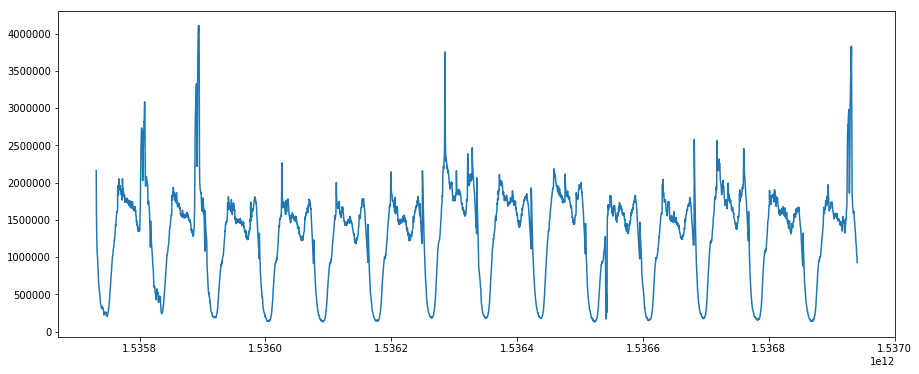

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(data.timestamp, data.KPI)
plt.show()

In [8]:
diff1 = data.KPI.diff(1)

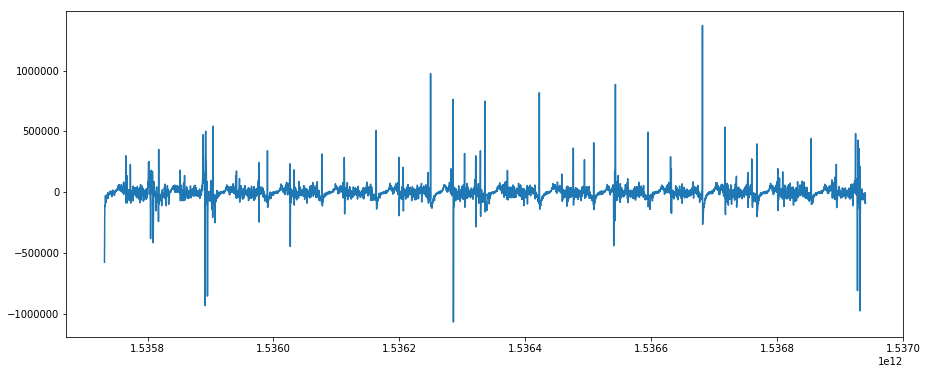

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(data.timestamp, diff1)
plt.show()

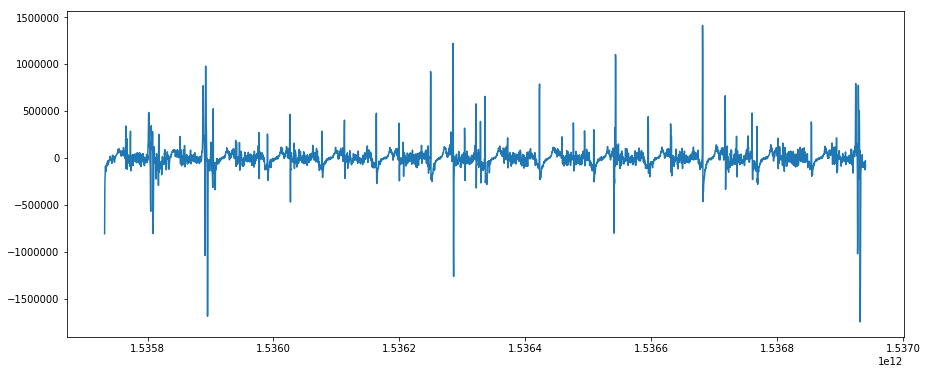

In [13]:
diff2 = data.KPI.diff(2)
plt.figure(figsize=(15, 6))
plt.plot(data.timestamp, diff2)
plt.show()

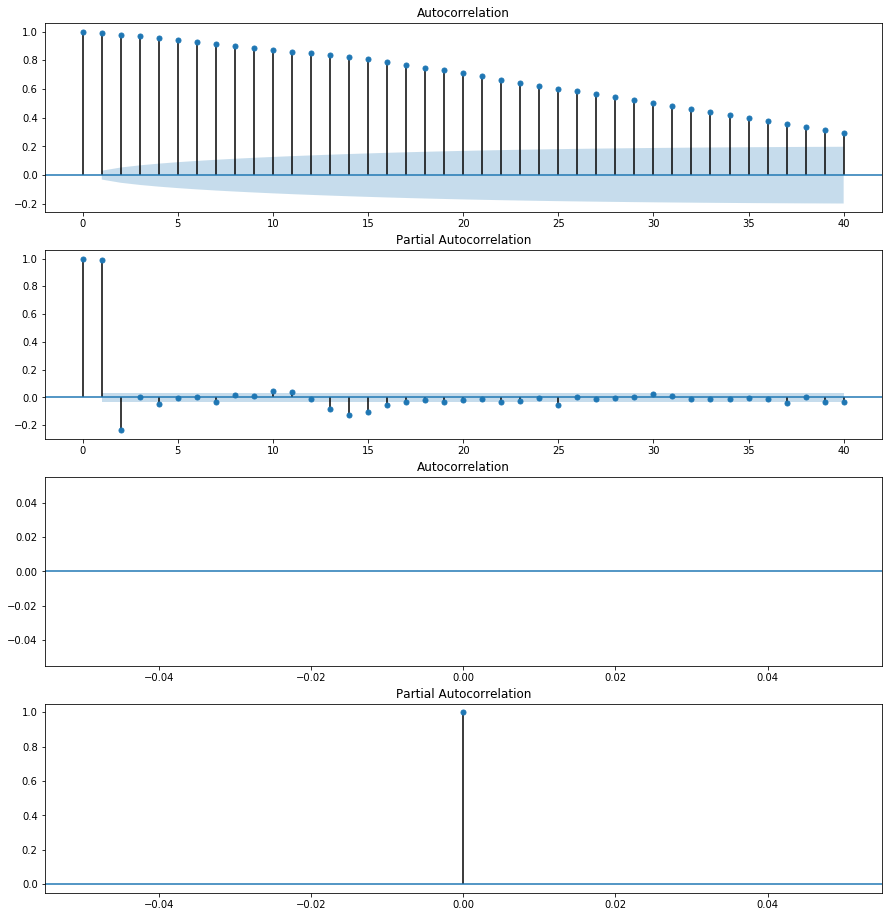

In [68]:
fig = plt.figure(figsize=(15,16))

ax0 = fig.add_subplot(411)
fig = sm.graphics.tsa.plot_acf(data.KPI, lags=40, ax=ax0)
ax1 = fig.add_subplot(412)
fig = sm.graphics.tsa.plot_pacf(data.KPI, lags=40, ax=ax1)
# 图一拖尾，图二截尾，故使用AR模型
# https://www.jianshu.com/p/f9e4cfc69e12

ax2 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_acf(diff1, lags=40, ax=ax2)
ax3 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_pacf(diff1, lags=40, ax=ax3)

In [27]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data.KPI)
print(adftest[2])
print('原始序列的检验结果为：',adftest)

24
原始序列的检验结果为： (-8.200898010522803, 7.235705453256942e-13, 24, 4007, {'1%': -3.4319830157514812, '5%': -2.86226157702636, '10%': -2.56715410307542}, 101148.47753635157)


In [22]:
#对序列做白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'白噪声检验结果：',acorr_ljungbox(data.KPI, lags= 1)) #返回统计量和 p 值

白噪声检验结果： (array([3968.13555588]), array([0.]))


In [33]:
from statsmodels.tsa.ar_model import AR
ar_model = AR(data.KPI)
model_fit = ar_model.fit()
print('lag: %s' % model_fit.k_ar)
print('coefficients: %s' % model_fit.params)

lag: 30
coefficients: const      22255.784486
L1.KPI         1.209299
L2.KPI        -0.252898
L3.KPI         0.073970
L4.KPI        -0.030808
L5.KPI        -0.020866
L6.KPI         0.039590
L7.KPI        -0.047055
L8.KPI         0.009959
L9.KPI        -0.039122
L10.KPI       -0.007334
L11.KPI        0.034646
L12.KPI        0.066322
L13.KPI        0.054160
L14.KPI       -0.007919
L15.KPI       -0.050806
L16.KPI       -0.014528
L17.KPI       -0.015913
L18.KPI        0.003074
L19.KPI        0.001706
L20.KPI       -0.023056
L21.KPI        0.026446
L22.KPI       -0.002251
L23.KPI       -0.034872
L24.KPI        0.069920
L25.KPI       -0.062233
L26.KPI        0.011597
L27.KPI       -0.000966
L28.KPI       -0.008411
L29.KPI       -0.011598
L30.KPI        0.012748
dtype: float64


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = model_fit.predict(start=30, end=len(data.KPI)+29)
print(len(predictions))
error = mean_squared_error(data.KPI, predictions)
print('Test MSE: %.3f' % error)
error = mean_absolute_error(data.KPI, predictions)
print('Test MAE: %.3f' % error)

4032
Test MSE: 387989533977.591
Test MAE: 464473.267


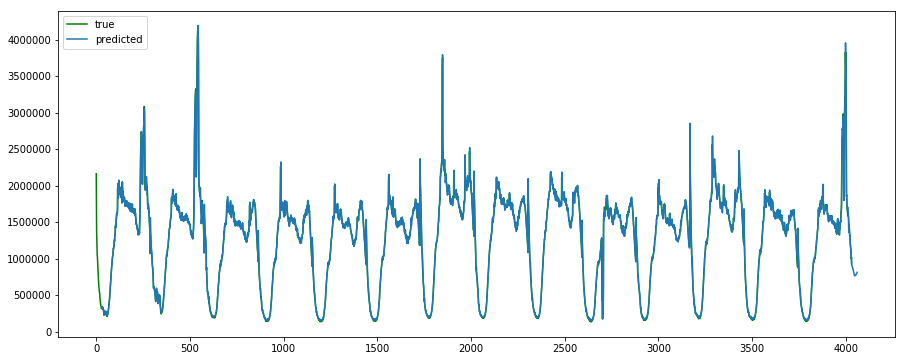

In [60]:
plt.figure(figsize=(15, 6))
plt.plot(data.KPI, label="true", color='green')
plt.plot(predictions, label="predicted")
plt.legend()
plt.show()

In [64]:
predictions[:-30]

30      3.291116e+05
31      3.274881e+05
32      3.345175e+05
33      3.437543e+05
34      3.329937e+05
35      3.249956e+05
36      3.088619e+05
37      3.221695e+05
38      3.028961e+05
39      3.016975e+05
40      2.849234e+05
41      2.448823e+05
42      2.345762e+05
43      2.391711e+05
44      2.571283e+05
45      2.775668e+05
46      2.708313e+05
47      2.585232e+05
48      2.720823e+05
49      2.807096e+05
50      2.644305e+05
51      2.607079e+05
52      2.705155e+05
53      2.732682e+05
54      2.476674e+05
55      2.257580e+05
56      2.328874e+05
57      2.287284e+05
58      2.259321e+05
59      2.208536e+05
            ...     
4002    3.714443e+06
4003    2.739155e+06
4004    1.855011e+06
4005    1.872886e+06
4006    1.804739e+06
4007    1.758546e+06
4008    1.684215e+06
4009    1.691408e+06
4010    1.696572e+06
4011    1.704087e+06
4012    1.691953e+06
4013    1.670351e+06
4014    1.636205e+06
4015    1.481222e+06
4016    1.362432e+06
4017    1.396999e+06
4018    1.402

In [63]:
data.KPI[30:]

30       321458
31       330851
32       339615
33       332955
34       324880
35       306704
36       313332
37       299670
38       293646
39       280637
40       244685
41       223540
42       226247
43       237754
44       256874
45       256080
46       244928
47       253548
48       262355
49       248601
50       244849
51       256421
52       262535
53       241702
54       215797
55       214811
56       211448
57       208142
58       205250
59       208557
         ...   
4002    3049737
4003    2076487
4004    1901442
4005    1815672
4006    1747148
4007    1691971
4008    1658566
4009    1644882
4010    1627123
4011    1587362
4012    1615269
4013    1622085
4014    1583494
4015    1524009
4016    1517886
4017    1480884
4018    1473248
4019    1414437
4020    1378508
4021    1344028
4022    1324285
4023    1282411
4024    1218950
4025    1193233
4026    1175773
4027    1135483
4028    1049150
4029    1021632
4030    1019847
4031     929274
Name: KPI, Length: 4002,

In [65]:
predictions.to_csv('AR_prediction.csv')

In [66]:
max(data.KPI)

4110646

In [69]:
max(predictions)

4196624.806035241

In [70]:
predictions_test = model_fit.predict(start=len(data.KPI), end=2*len(data.KPI))
len(predictions_test)

4033

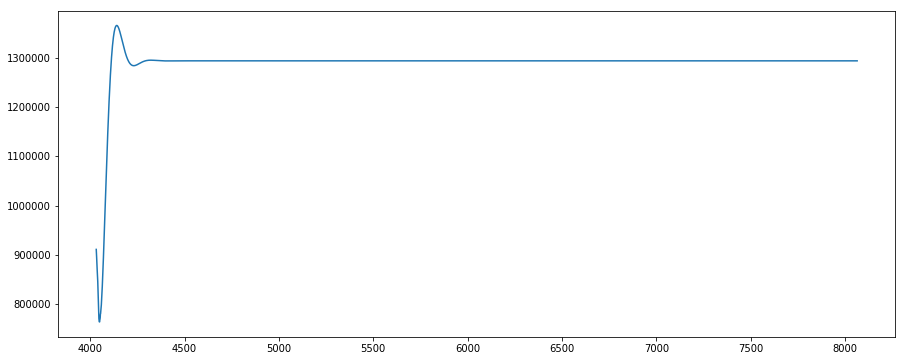

In [73]:
plt.figure(figsize=(15, 6))
plt.plot(predictions_test)
plt.show()